https://www.learndatasci.com/glossary/binary-classification/

In [61]:
import pandas as pd
import seaborn as sns

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.inspection import DecisionBoundaryDisplay


In [62]:
df = pd.read_csv('encoded_df.csv')

In [66]:
df = df.drop(df[df.home_results > 2].index)

In [67]:
print(df['home_results'].value_counts())

0    457
1    245
Name: home_results, dtype: int64


In [68]:
df = df.drop(columns=['Winner', 'Pts', 'Loser', 'Pts.1', 'winners', 'losers', 'win_rank', 
                     'lose_rank', 'hours', 'null', 'half', 'quart', 'three_quart'])

In [69]:
X = df.drop(columns=['home_results'])
y = df['home_results']


In [70]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.20, random_state=0)


In [81]:
from sklearn.preprocessing import StandardScaler

ss_train = StandardScaler()
X_train = ss_train.fit_transform(X_train)

ss_test = StandardScaler()
X_test = ss_test.fit_transform(X_test)


In [202]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(max_iter=8)

In [203]:
clf.fit(X_train, y_train)

LogisticRegression(max_iter=8)

In [204]:
predictions = clf.predict(X_test)

In [205]:
from sklearn.metrics import confusion_matrix

In [206]:
confusion_matrix(y_test, predictions)


array([[87,  1],
       [44,  9]])

In [207]:
from sklearn.metrics import confusion_matrix

# cm = confusion_matrix(y_test, predictions)

TN, FP, FN, TP = confusion_matrix(y_test, predictions).ravel()

print('True Positive(TP)  = ', TP)
print('True Negative(TN)  = ', TN)
print('False Positive(FP) = ', FP)
print('False Negative(FN) = ', FN)


True Positive(TP)  =  9
True Negative(TN)  =  87
False Positive(FP) =  1
False Negative(FN) =  44


In [208]:
# True Positive(TP)  =  9
# True Negative(TN)  =  87
# False Positive(FP) =  1
# False Negative(FN) =  44
# Accuracy of the binary classifier = 0.681

In [209]:
accuracy =  (tp + tn) / (tp + fp + tn + fn)

print('Accuracy of the binary classifier = {:0.3f}'.format(accuracy))


Accuracy of the binary classifier = 0.681


In [213]:
models = {}

# Logistic Regression
from sklearn.linear_model import LogisticRegression
models['Logistic Regression'] = LogisticRegression()

# Support Vector Machines
from sklearn.svm import LinearSVC
models['Support Vector Machines'] = LinearSVC(max_iter=10000)

# Decision Trees
from sklearn.tree import DecisionTreeClassifier
models['Decision Trees'] = DecisionTreeClassifier()

# Random Forest
from sklearn.ensemble import RandomForestClassifier
models['Random Forest'] = RandomForestClassifier()

# Naive Bayes
from sklearn.naive_bayes import GaussianNB
models['Naive Bayes'] = GaussianNB()

# K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
models['K-Nearest Neighbor'] = KNeighborsClassifier()


In [214]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

accuracy, precision, recall = {}, {}, {}

for key in models.keys():
    
    # Fit the classifier
    models[key].fit(X_train, y_train)
    
    # Make predictions
    predictions = models[key].predict(X_test)
    
    # Calculate metrics
    accuracy[key] = accuracy_score(predictions, y_test)
    precision[key] = precision_score(predictions, y_test)
    recall[key] = recall_score(predictions, y_test)


In [215]:
import pandas as pd

df_model = pd.DataFrame(index=models.keys(), columns=['Accuracy', 'Precision', 'Recall'])
df_model['Accuracy'] = accuracy.values()
df_model['Precision'] = precision.values()
df_model['Recall'] = recall.values()

df_model


,Accuracy,Precision,Recall
Logistic Regression,0.680851,0.169811,0.900000
Support Vector Machines,0.680851,0.188679,0.833333
Decision Trees,0.624113,0.452830,0.500000
Random Forest,0.617021,0.207547,0.478261
Naive Bayes,0.659574,0.301887,0.592593
K-Nearest Neighbor,0.624113,0.301887,0.500000


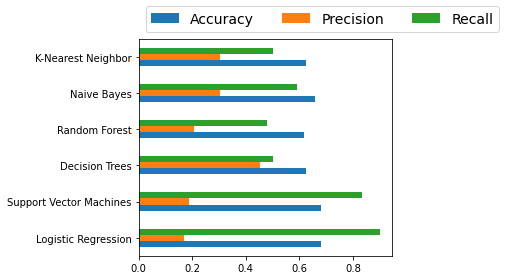

In [216]:
ax = df_model.plot.barh()
ax.legend(
    ncol=len(models.keys()), 
    bbox_to_anchor=(0, 1), 
    loc='lower left', 
    prop={'size': 14}
)
plt.tight_layout()


- https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html

- https://scikit-learn.org/stable/auto_examples/preprocessing/plot_discretization_classification.html

In [220]:
import numpy as np
import pandas as pd
from sklearn import model_selection, metrics
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier

/Users/ryantalbot/opt/anaconda3/envs/tf2/lib/python3.9/site-packages/sklearn/experimental/enable_hist_gradient_boosting.py:16: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


In [225]:

gbc=HistGradientBoostingClassifier(learning_rate=0.01, 
        max_iter=2000, max_leaf_nodes=6, validation_fraction=0.2, 
        n_iter_no_change=15, random_state=42).fit(X_train,y_train)

In [275]:
hardpredtst=gbc.predict(X_test)
def conf_matrix(y_test,pred):
    ((tn, fp), (fn, tp)) = metrics.confusion_matrix(y_test, pred)
    ((tnr,fpr),(fnr,tpr))= metrics.confusion_matrix(y_test, pred, 
            normalize='true')
    return pd.DataFrame([[f'TN = {tn} (TNR = {tnr:1.2%})', 
                                f'FP = {fp} (FPR = {fpr:1.2%})'], 
                         [f'FN = {fn} (FNR = {fnr:1.2%})', 
                                f'TP = {tp} (TPR = {tpr:1.2%})']],
            index=['True 0(Legit)', 'True 1(Fraud)'], 
            columns=['Pred 0(Approve as Legit)', 
                            'Pred 1(Deny as Fraud)'])
conf_matrix(y_test,hardpredtst)

,Pred 0(Approve as Legit),Pred 1(Deny as Fraud)
True 0(Legit),TN = 77 (TNR = 87.50%),FP = 11 (FPR = 12.50%)
True 1(Fraud),FN = 33 (FNR = 62.26%),TP = 20 (TPR = 37.74%)


In [276]:
### True Positive(TP)  =  9
### True Negative(TN)  =  87
### False Positive(FP) =  1
### False Negative(FN) =  44
### Accuracy of the binary classifier = 0.681

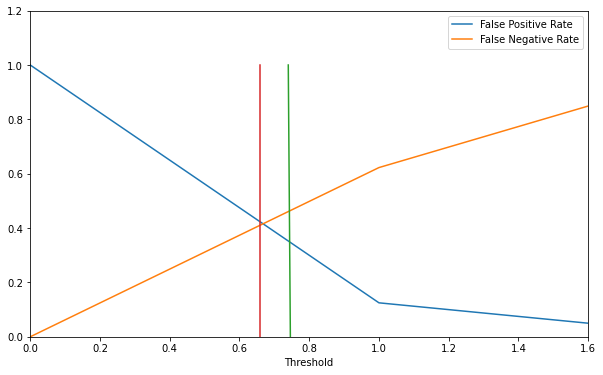

In [290]:
predtst = gbc.predict(X_test)
fpr, tpr, thresholds = metrics.roc_curve(y_test, predtst)
dfplot=pd.DataFrame({'Threshold':thresholds, 
        'False Positive Rate':fpr, 
        'False Negative Rate': 1.-tpr})
ax=dfplot.plot(x='Threshold', y=['False Positive Rate',
        'False Negative Rate'], figsize=(10,6))
ax.plot([0.746,0.74],[0,1]) #mark example thresh.
ax.plot([0.66,0.66],[0,1]) #mark example thresh.
ax.set_xbound(0,1.60); ax.set_ybound(0,1.2) #zoom in



In [313]:
hardpredtst_tuned_thresh = np.where(predtst >= 0.66, 1, 0)
conf_matrix(y_test, hardpredtst_tuned_thresh)

,Pred 0(Approve as Legit),Pred 1(Deny as Fraud)
True 0(Legit),TN = 77 (TNR = 87.50%),FP = 11 (FPR = 12.50%)
True 1(Fraud),FN = 33 (FNR = 62.26%),TP = 20 (TPR = 37.74%)


In [314]:
print('y_train class distribution')
print(y_train.value_counts(normalize=True))

print('y_test class distribution')
print(y_test.value_counts(normalize=True))

y_train class distribution
0    0.657754
1    0.342246
Name: home_results, dtype: float64
y_test class distribution
0    0.624113
1    0.375887
Name: home_results, dtype: float64


In [315]:
clf = RandomForestClassifier(n_jobs=-1)

param_grid = {
    'min_samples_split': [3, 5, 10], 
    'n_estimators' : [100, 300],
    'max_depth': [3, 5, 15, 25],
    'max_features': [3, 5, 10, 20]
}


In [317]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import roc_curve, precision_recall_curve, auc, make_scorer, recall_score, accuracy_score, precision_score, confusion_matrix

In [323]:


scorers = {
    'precision_score': make_scorer(precision_score),
    'recall_score': make_scorer(recall_score),
    'accuracy_score': make_scorer(accuracy_score)
}



https://www.kaggle.com/code/kevinarvai/fine-tuning-a-classifier-in-scikit-learn/notebook

In [326]:
def grid_search_wrapper(refit_score='precision_score'):
    """
    fits a GridSearchCV classifier using refit_score for optimization
    prints classifier performance metrics
    """
    skf = StratifiedKFold(n_splits=10)
    grid_search = GridSearchCV(clf, param_grid, scoring=scorers, refit=refit_score,
                           cv=skf, return_train_score=True, n_jobs=-1)
    grid_search.fit(X_train, y_train.values)

    # make the predictions
    y_pred = grid_search.predict(X_test)

    print('Best params for {}'.format(refit_score))
    print(grid_search.best_params_)

    # confusion matrix on the test data.
    print('\nConfusion matrix of Random Forest optimized for {} on the test data:'.format(refit_score))
    print(pd.DataFrame(confusion_matrix(y_test, y_pred),
                 columns=['pred_neg', 'pred_pos'], index=['neg', 'pos']))
    return grid_search

In [327]:
grid_search_clf = grid_search_wrapper(refit_score='precision_score')

/Users/ryantalbot/opt/anaconda3/envs/tf2/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ryantalbot/opt/anaconda3/envs/tf2/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ryantalbot/opt/anaconda3/envs/tf2/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ryantalbot/opt/anaconda3/envs/tf2

Best params for precision_score
{'max_depth': 3, 'max_features': 3, 'min_samples_split': 3, 'n_estimators': 100}

Confusion matrix of Random Forest optimized for precision_score on the test data:
     pred_neg  pred_pos
neg        87         1
pos        49         4


In [328]:
results = pd.DataFrame(grid_search_clf.cv_results_)
results = results.sort_values(by='mean_test_precision_score', ascending=False)
results[['mean_test_precision_score', 'mean_test_recall_score', 'mean_test_accuracy_score',
         'param_max_depth', 'param_max_features', 'param_min_samples_split',
         'param_n_estimators']].head()

,mean_test_precision_score,mean_test_recall_score,mean_test_accuracy_score,param_max_depth,param_max_features,param_min_samples_split,param_n_estimators
0,0.613095,0.156579,0.677350,3,3,3,100
20,0.609524,0.166842,0.679135,3,20,5,100
12,0.603571,0.177105,0.682675,3,10,3,100
7,0.603095,0.161579,0.677350,3,5,3,300
24,0.598095,0.219474,0.682707,5,3,3,100


In [329]:
grid_search_clf = grid_search_wrapper(refit_score='recall_score')

/Users/ryantalbot/opt/anaconda3/envs/tf2/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ryantalbot/opt/anaconda3/envs/tf2/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ryantalbot/opt/anaconda3/envs/tf2/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ryantalbot/opt/anaconda3/envs/tf2

Best params for recall_score
{'max_depth': 15, 'max_features': 10, 'min_samples_split': 3, 'n_estimators': 100}

Confusion matrix of Random Forest optimized for recall_score on the test data:
     pred_neg  pred_pos
neg        73        15
pos        39        14


In [330]:
results = pd.DataFrame(grid_search_clf.cv_results_)
results = results.sort_values(by='mean_test_recall_score', ascending=False)
results[['mean_test_precision_score', 'mean_test_recall_score', 'mean_test_accuracy_score',
         'param_max_depth', 'param_max_features', 'param_min_samples_split',
         'param_n_estimators']].head()

,mean_test_precision_score,mean_test_recall_score,mean_test_accuracy_score,param_max_depth,param_max_features,param_min_samples_split,param_n_estimators
60,0.521265,0.387105,0.664944,15,10,3,100
84,0.513391,0.386842,0.661372,25,10,3,100
90,0.492018,0.376316,0.648872,25,20,3,100
89,0.545006,0.365789,0.673810,25,10,10,300
61,0.488472,0.365789,0.648872,15,10,3,300


In [331]:
# this gives the probability [0,1] that each sample belongs to class 1
y_scores = grid_search_clf.predict_proba(X_test)[:, 1]

# for classifiers with decision_function, this achieves similar results
# y_scores = classifier.decision_function(X_test)

In [332]:
def adjusted_classes(y_scores, t):

#     This function adjusts class predictions based on the prediction threshold (t).
#     Will only work for binary classification problems.

    return [1 if y >= t else 0 for y in y_scores]

In [333]:
# generate the precision recall curve
p, r, thresholds = precision_recall_curve(y_test, y_scores)

In [343]:
def precision_recall_threshold(t=0.5):
    
#     plots the precision recall curve and shows the current value for each
#     by identifying the classifier's threshold (t).

    
    # generate new class predictions based on the adjusted_classes
    # function above and view the resulting confusion matrix.
    y_pred_adj = adjusted_classes(y_scores, t)
    print(pd.DataFrame(confusion_matrix(y_test, y_pred_adj),
                       columns=['pred_neg', 'pred_pos'], 
                       index=['neg', 'pos']))
    
    # plot the curve
    plt.figure(figsize=(8,8))
    plt.title("Precision and Recall curve ^ = current threshold")
    plt.step(r, p, color='b', alpha=0.2,
             where='post')
    plt.fill_between(r, p, step='post', alpha=0.2,
                     color='b')
    plt.ylim([0.5, .57]);
    plt.xlim([0.5, .7]);
    plt.xlabel('Recall');
    plt.ylabel('Precision');
    
    # plot the current threshold on the line
    close_default_clf = np.argmin(np.abs(thresholds - t))
    plt.plot(r[close_default_clf], p[close_default_clf], '^', c='k',
            markersize=15)

     pred_neg  pred_pos
neg        70        18
pos        33        20


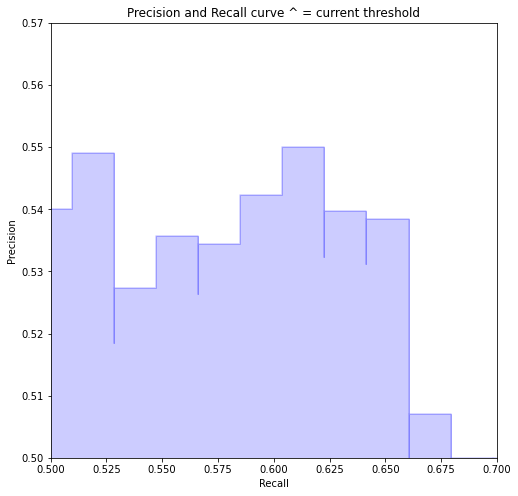

In [348]:
# The best I could do with 1 FN was 0.17, 
# but re-execute to watch the confusion matrix change.
precision_recall_threshold(0.47)

In [349]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    
#     Modified from:
#     Hands-On Machine learning with Scikit-Learn
#     and TensorFlow; p.89
    
    plt.figure(figsize=(8, 8))
    plt.title("Precision and Recall Scores as a function of the decision threshold")
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.ylabel("Score")
    plt.xlabel("Decision Threshold")
    plt.legend(loc='best')

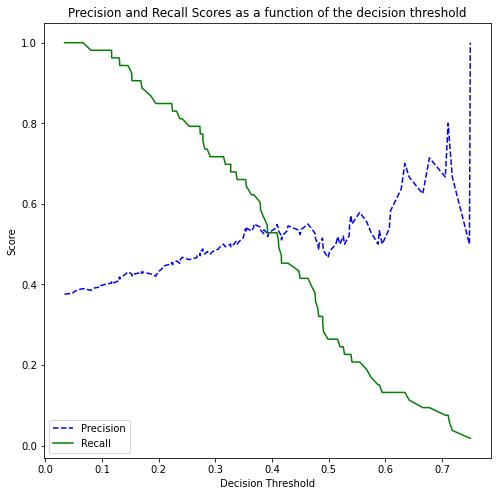

In [350]:
# use the same p, r, thresholds that were previously calculated
plot_precision_recall_vs_threshold(p, r, thresholds)

In [351]:
def plot_roc_curve(fpr, tpr, label=None):
    
#     The ROC curve, modified from 
#     Hands-On Machine learning with Scikit-Learn and TensorFlow; p.91
    
    plt.figure(figsize=(8,8))
    plt.title('ROC Curve')
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.005, 1, 0, 1.005])
    plt.xticks(np.arange(0,1, 0.05), rotation=90)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate (Recall)")
    plt.legend(loc='best')

0.6728130360205832


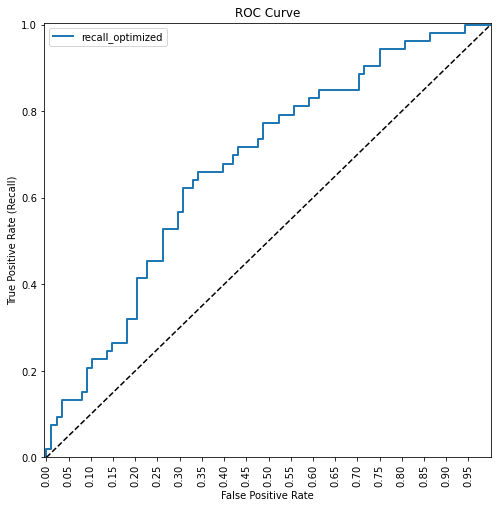

In [352]:
fpr, tpr, auc_thresholds = roc_curve(y_test, y_scores)
print(auc(fpr, tpr)) # AUC of ROC
plot_roc_curve(fpr, tpr, 'recall_optimized')